In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

This file contains all the client and call details as well as the target variable subscribed

After it we can check the data to trained model to predict whether a new set of clients will subscribe the term deposit or not

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


The Dataset contains 31647 rows and 18 columns in that 18 columns 1 is my target variable

In [4]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [5]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [6]:
df.nunique().to_frame('no of unique values')

,no of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


This are the unique values for all the columns

In [7]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


This gives the statistical information of the numerical column.

From the above description we can observe the following:
        
   1. The count of all the columns are same means there are no missing values
   2. The mean value is greater then the median in pdays, previous, means the data is skewed in right side
   3. The data in the column ID, age, balance, day, duration, campaign, means the data is skewed in left side
   4. we can observe there is a huge difference between 75% and max in some columns hence there are outlyers are present in the data

In [8]:
df.skew()

ID           0.005851
age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

In [9]:
df.drop('ID',axis=1,inplace=True)

In [10]:
catagorical=[]
numerical=[]

for i in df.dtypes.index:
    if df.dtypes[i]== 'object':
        catagorical.append(i)
    
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical.append(i)

# Univariant analysis

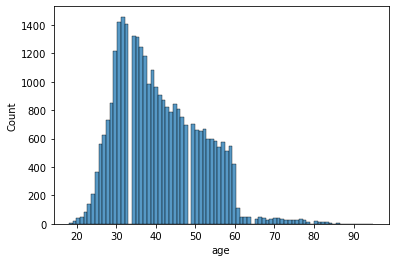

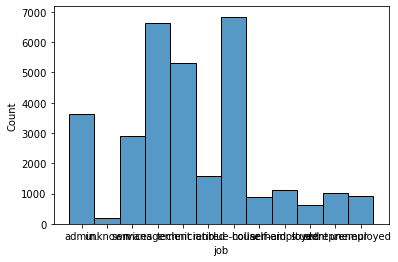

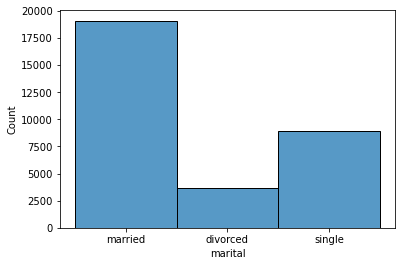

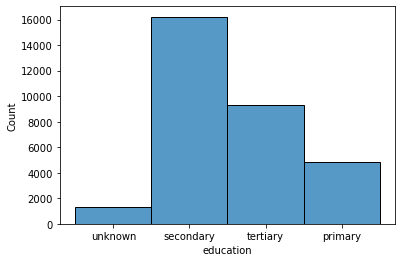

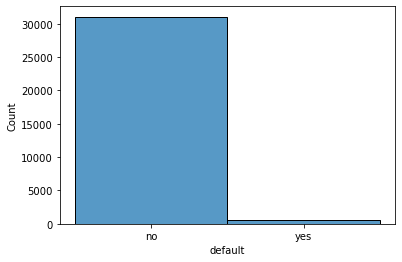

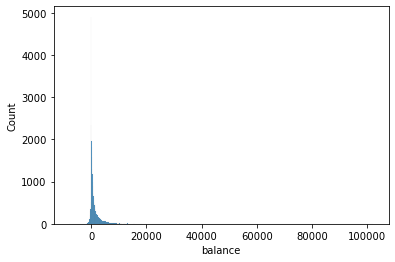

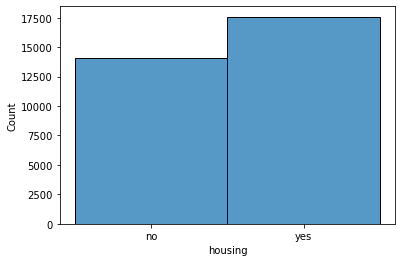

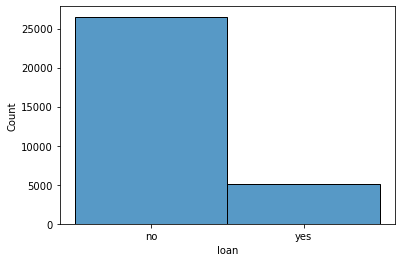

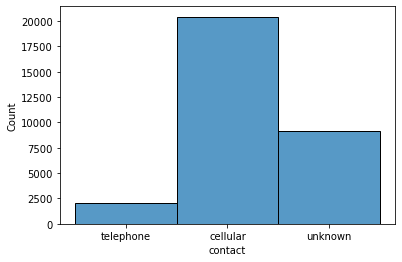

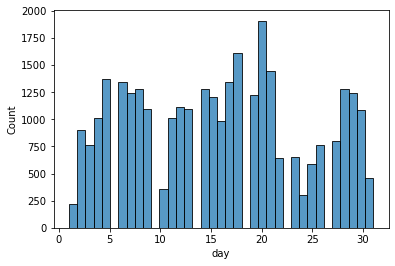

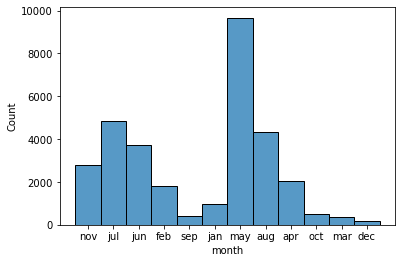

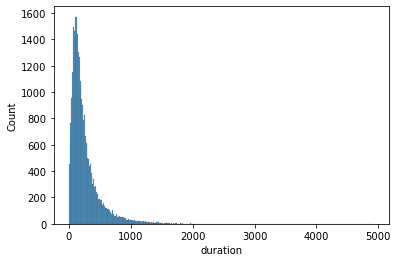

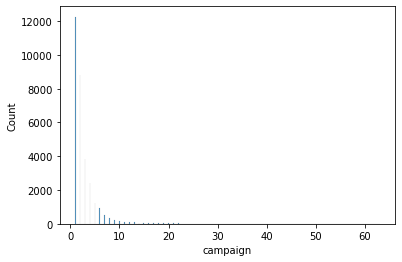

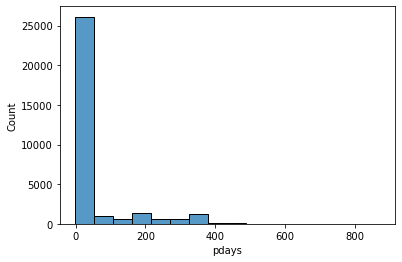

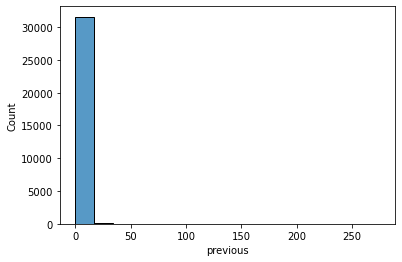

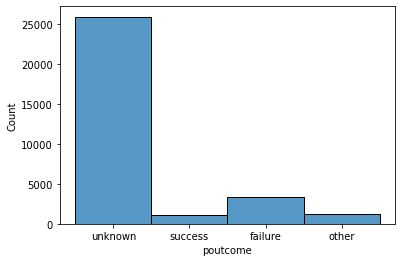

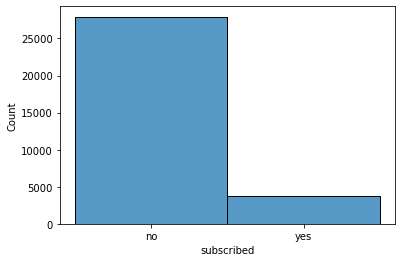

In [11]:
m = df.columns
for i in m:
    plt.figure()
    sns.histplot(x=df[i],data=df)
    #print(df[i].value_counts())
    



# Bivariant Analysis

<AxesSubplot:>

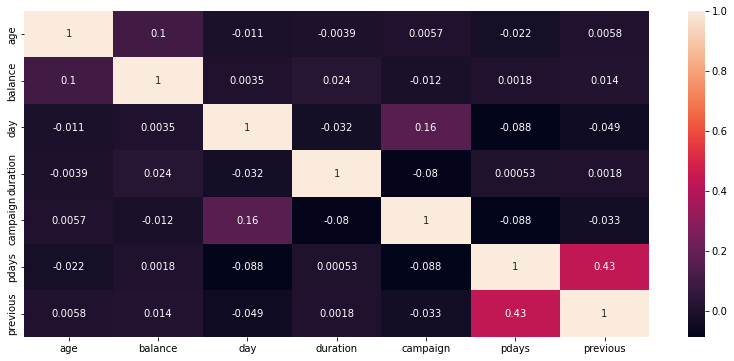

In [12]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True)

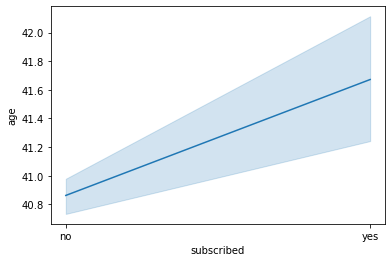

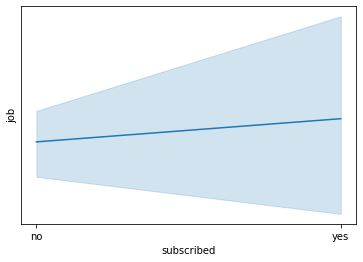

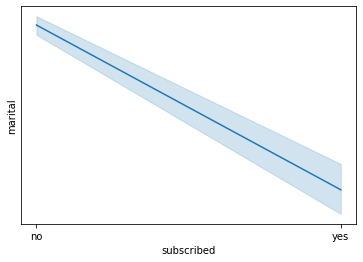

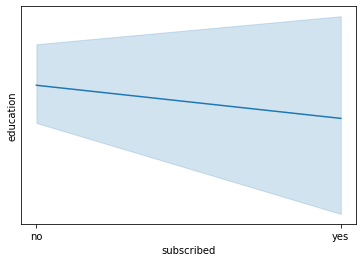

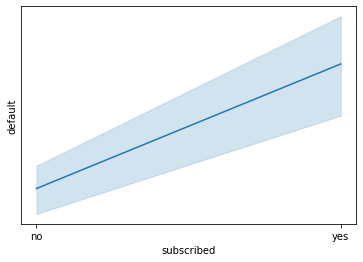

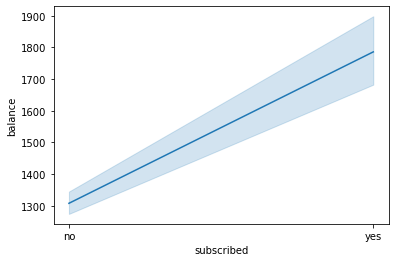

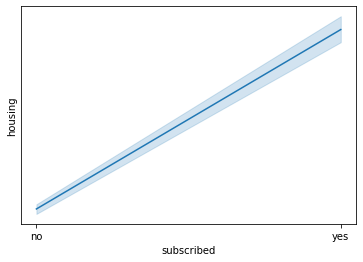

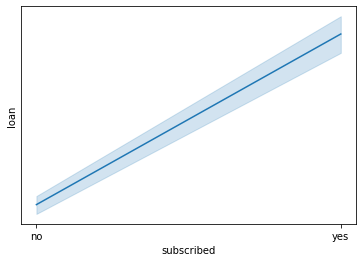

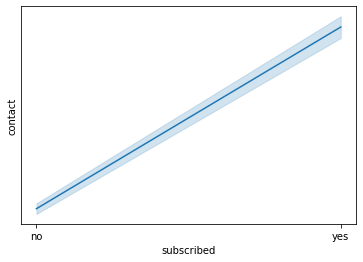

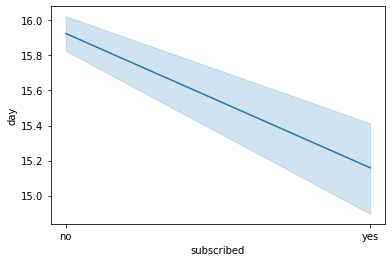

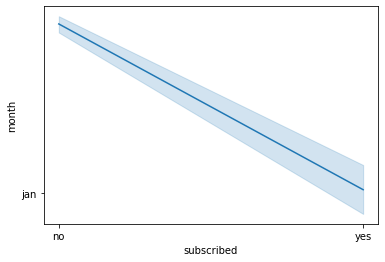

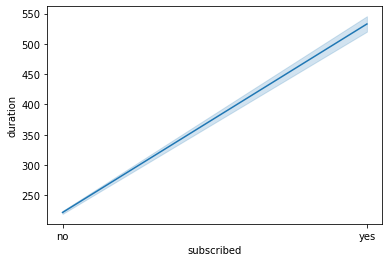

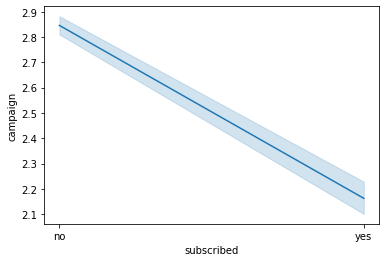

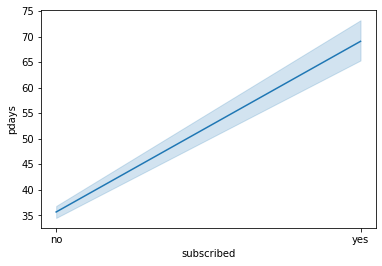

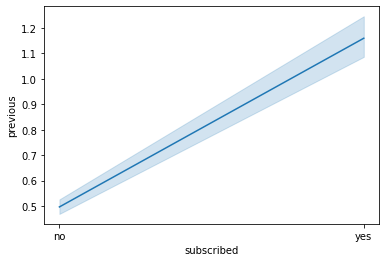

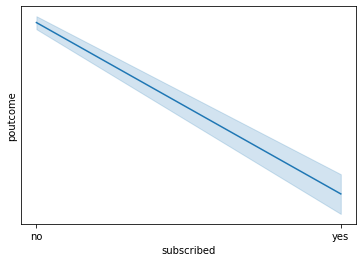

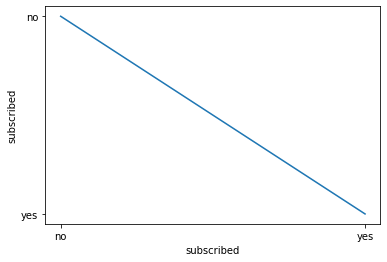

In [13]:
for i in m:
    plt.figure()
    sns.lineplot(y=df[i],x='subscribed',data=df)

Text(0.5, 1.0, 'Bar Chart ')

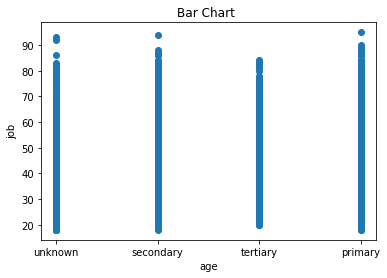

In [14]:
x = df['education']
y = df['age']
plt.scatter(x,y)
plt.xlabel('age')
plt.ylabel('job')
plt.title('Bar Chart ')

<AxesSubplot:xlabel='housing', ylabel='age'>

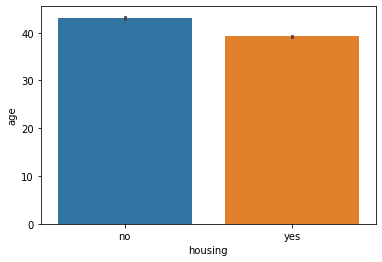

In [15]:
sns.barplot(x='housing', y='age',data=df)

<AxesSubplot:xlabel='marital', ylabel='balance'>

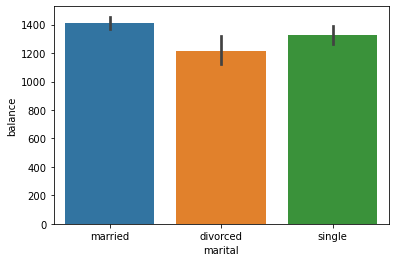

In [16]:
sns.barplot(x='marital', y='balance',data=df)

<AxesSubplot:xlabel='default', ylabel='age'>

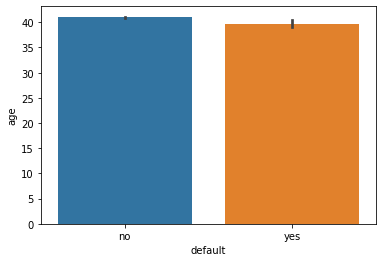

In [17]:
sns.barplot(x='default', y='age',data=df)
#print(df[''].value_counts())

<AxesSubplot:xlabel='contact', ylabel='campaign'>

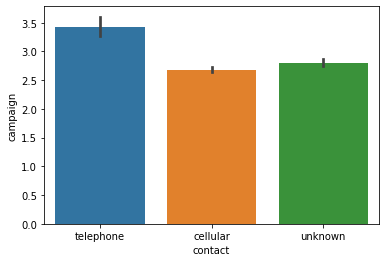

In [18]:
sns.barplot(x='contact', y='campaign',data=df)

<AxesSubplot:xlabel='month', ylabel='previous'>

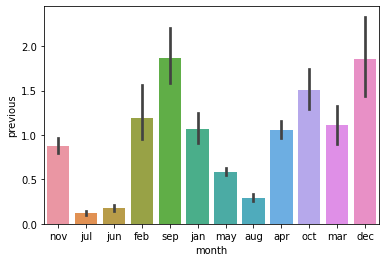

In [19]:
sns.barplot(x='month', y='previous',data=df)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
LE= LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]=LE.fit_transform(df[i].values.reshape(-1,1))
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [22]:
from scipy.stats import zscore

In [23]:
z= np.abs(zscore(df))
z

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,1.415793,1.324317,0.275405,2.369229,0.137234,0.187933,1.118201,0.439893,0.395076,0.379579,1.154007,0.832754,0.245906,0.408555,0.237059,0.441777,0.364694
1,0.937156,2.037729,0.275405,0.300345,0.137234,0.449397,1.118201,0.439893,0.716695,0.499526,0.177462,0.649957,0.245906,0.408555,0.237059,0.441777,0.364694
2,1.313627,0.815167,0.275405,0.300345,0.137234,0.156159,0.894294,0.439893,0.716695,0.259631,0.177462,0.070449,0.567059,0.408555,0.237059,0.441777,0.364694
3,1.509911,0.101755,1.922374,1.034442,0.137234,0.635055,1.118201,0.439893,0.716695,0.739422,0.155405,2.368149,0.567059,0.447299,1.001336,0.576498,2.742026
4,0.937156,1.426448,0.275405,0.300345,0.137234,0.411091,0.894294,0.439893,0.716695,1.419637,0.843197,0.474054,0.567059,0.408555,0.237059,0.441777,0.364694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.125392,0.101755,1.371563,1.034442,0.137234,0.450388,0.894294,0.439893,0.716695,0.460055,0.821140,0.552724,0.245906,0.408555,0.237059,0.441777,0.364694
31643,1.133439,0.101755,1.922374,1.034442,0.137234,0.324903,1.118201,2.273280,0.716695,1.299690,0.155405,0.699635,0.245906,0.408555,0.237059,0.441777,2.742026
31644,0.843038,0.101755,1.371563,1.034442,0.137234,0.347358,1.118201,0.439893,0.716695,1.059794,1.508931,0.859979,0.075247,0.408555,0.237059,0.441777,0.364694
31645,1.509911,1.426448,0.275405,0.300345,0.137234,0.376088,0.894294,0.439893,0.395076,0.100212,0.821140,0.918319,1.359859,2.994723,4.716521,2.613048,0.364694


In [24]:
np.where(z>3)

(array([   10,    21,    26, ..., 31622, 31645, 31646], dtype=int64),
 array([ 4, 12,  5, ..., 13, 14, 11], dtype=int64))

In [25]:
df1= df[(z<3).all(axis=1)]
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4,2,1,0,2968,0,0,2,20,6,30,4,-1,0,3,0
31641,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0,3,0
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1


In [26]:
loss_percentage= (31647-27584)/31647*100
print(loss_percentage)

12.83849969981357


# Seperating Features And Target Variable

In [27]:
x= df1.drop('subscribed',axis=1)
y= df1.iloc[:,-1]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4,2,1,0,2968,0,0,2,20,6,30,4,-1,0,3
31641,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0,3
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3


# Feature Scaling Using Standard Scaller

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
st= MinMaxScaler()
x= st.fit_transform(x)
x= pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.703704,0.000000,0.5,1.000000,0.0,0.413103,0.0,0.0,0.5,0.600000,0.818182,0.042760,0.090909,0.000000,0.000000,1.000000
1,0.240741,1.000000,0.5,0.333333,0.0,0.280000,0.0,0.0,0.0,0.633333,0.454545,0.088435,0.090909,0.000000,0.000000,1.000000
2,0.166667,0.636364,0.5,0.333333,0.0,0.341241,1.0,0.0,0.0,0.566667,0.454545,0.233236,0.000000,0.000000,0.000000,1.000000
3,0.722222,0.363636,0.0,0.666667,0.0,0.506483,0.0,0.0,0.0,0.700000,0.545455,0.842566,0.000000,0.251479,0.428571,0.666667
4,0.240741,0.818182,0.5,0.333333,0.0,0.288000,1.0,0.0,0.0,0.100000,0.272727,0.369291,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27579,0.462963,0.363636,1.0,0.333333,0.0,0.484483,0.0,0.0,1.0,0.633333,0.545455,0.029155,0.272727,0.000000,0.000000,1.000000
27580,0.351852,0.818182,1.0,0.666667,0.0,0.370069,0.0,0.0,1.0,0.166667,0.545455,0.429543,0.090909,0.000000,0.000000,1.000000
27581,0.203704,0.363636,1.0,0.666667,0.0,0.279793,1.0,0.0,0.0,0.366667,0.727273,0.112731,0.090909,0.000000,0.000000,1.000000
27582,0.648148,0.363636,0.0,0.666667,0.0,0.306000,0.0,1.0,0.0,0.133333,0.545455,0.425656,0.090909,0.000000,0.000000,1.000000


In [57]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif= pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,6.715510,0
1,2.838329,1
2,5.283240,2
3,3.828326,3
4,NaN,4
5,9.531763,5
6,2.560785,6
7,1.202757,7
8,2.036590,8
9,4.112446,9


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
maxaccu = 0
maxrs = 0

In [31]:
for i in tqdm(range (1,100)):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state = i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxaccu:
        maxaccu = acc
        maxrs = i

print("Best Accuracy score is:",maxaccu,'at Random state:',maxrs)
    

100%|██████████| 99/99 [48:20<00:00, 29.30s/it]    

Best Accuracy score is: 0.9181971967133881 at Random state: 94


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state = maxrs)

In [33]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
lg=LogisticRegression()
gnb=GaussianNB()
mnb= MultinomialNB()
dtc= DecisionTreeClassifier()
svm=SVC()
knn=KNeighborsClassifier()
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
model=[lg,gnb,mnb,dtc,svm,knn,RFC,ETC]

In [34]:
for M in tqdm(model):
    M.fit(x_train,y_train)
    pred=M.predict(x_test)
    print('accuracy score of ',M,'is',)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(M,x,y,cv=5)
    print(score)
    print(score.mean())
    print('difference between and cross validation score is',accuracy_score(y_test,pred) - score.mean())
    print("\n")

  0%|          | 0/8 [00:00<?, ?it/s]

accuracy score of  LogisticRegression() is
0.9040599323344611
[[7320  128]
 [ 666  162]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7448
           1       0.56      0.20      0.29       828

    accuracy                           0.90      8276
   macro avg       0.74      0.59      0.62      8276
weighted avg       0.88      0.90      0.88      8276



 12%|█▎        | 1/8 [00:00<00:05,  1.28it/s]

[0.90266449 0.90502084 0.90121443 0.90121443 0.90282814]
0.9025884657653194
difference between and cross validation score is 0.001471466569141766


accuracy score of  GaussianNB() is
0.8417109714838086
[[6592  856]
 [ 454  374]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7448
           1       0.30      0.45      0.36       828

    accuracy                           0.84      8276
   macro avg       0.62      0.67      0.64      8276
weighted avg       0.87      0.84      0.85      8276

[0.83994925 0.83868044 0.84339315 0.85209353 0.84662799]
0.8441488717778249


 38%|███▊      | 3/8 [00:01<00:01,  3.20it/s]

difference between and cross validation score is -0.0024379002940163597


accuracy score of  MultinomialNB() is
0.9001933301111649
[[7447    1]
 [ 825    3]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      7448
           1       0.75      0.00      0.01       828

    accuracy                           0.90      8276
   macro avg       0.83      0.50      0.48      8276
weighted avg       0.89      0.90      0.85      8276

[0.89813304 0.89758927 0.89795179 0.89777053 0.89775199]
0.8978393239802138
difference between and cross validation score is 0.0023540061309510474


accuracy score of  DecisionTreeClassifier() is
0.8842435959400676
[[6930  518]
 [ 440  388]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7448
           1       0.43      0.47      0.45       828

    accuracy                           0.88      8276
   macro avg       0.68      0.70      0.69      8276
w

 50%|█████     | 4/8 [00:02<00:02,  1.61it/s]

[0.88308864 0.87910096 0.88544499 0.88508247 0.88234228]
0.8830118666767088
difference between and cross validation score is 0.001231729263358794


accuracy score of  SVC() is
0.9110681488641856
[[7390   58]
 [ 678  150]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7448
           1       0.72      0.18      0.29       828

    accuracy                           0.91      8276
   macro avg       0.82      0.59      0.62      8276
weighted avg       0.90      0.91      0.89      8276



 62%|██████▎   | 5/8 [01:50<01:58, 39.38s/it]

[0.90719594 0.90846475 0.90538336 0.90610839 0.90826686]
0.9070838595925338
difference between and cross validation score is 0.003984289271651842


accuracy score of  KNeighborsClassifier() is
0.9127597873368777
[[7299  149]
 [ 573  255]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7448
           1       0.63      0.31      0.41       828

    accuracy                           0.91      8276
   macro avg       0.78      0.64      0.68      8276
weighted avg       0.90      0.91      0.90      8276



 75%|███████▌  | 6/8 [02:28<01:18, 39.01s/it]

[0.90538336 0.90483959 0.90284575 0.90012688 0.90518492]
0.9036760987825488
difference between and cross validation score is 0.00908368855432884


accuracy score of  RandomForestClassifier() is
0.9179555340744321
[[7303  145]
 [ 534  294]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      7448
           1       0.67      0.36      0.46       828

    accuracy                           0.92      8276
   macro avg       0.80      0.67      0.71      8276
weighted avg       0.91      0.92      0.91      8276



 88%|████████▊ | 7/8 [02:53<00:34, 34.45s/it]

[0.91390248 0.91390248 0.91281494 0.91571506 0.91153009]
0.913573011785183
difference between and cross validation score is 0.004382522289249069


accuracy score of  ExtraTreesClassifier() is
0.9148139197680039
[[7316  132]
 [ 573  255]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7448
           1       0.66      0.31      0.42       828

    accuracy                           0.91      8276
   macro avg       0.79      0.65      0.69      8276
weighted avg       0.90      0.91      0.90      8276



100%|██████████| 8/8 [03:10<00:00, 23.82s/it]

[0.9108211  0.91118361 0.91118361 0.91136487 0.91098622]
0.9111078842204785
difference between and cross validation score is 0.003706035547525355




# Now use Hyper Parameter Tuning for increase The Accuracy 

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
parameters = {'criterion':['gini', 'entropy'],
             'n_estimators':[50,100,200,350],
             'max_depth':[0,10,20,30],
             'random_state':[10,50,1000]}

In [37]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [38]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20, 30],
                         'n_estimators': [50, 100, 200, 350],
                         'random_state': [10, 50, 1000]})

In [39]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 30, 'n_estimators': 200, 'random_state': 50}

In [50]:
final= RandomForestClassifier(criterion='gini', max_depth= 30, n_estimators= 300, random_state= 350)
final.fit(x_train,y_train)
pred= final.predict(x_test)
acc= accuracy_score(y_test,pred)
acc*100

92.01304978250361

In [51]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [52]:
y_pred_prob = final.predict(x_test)

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

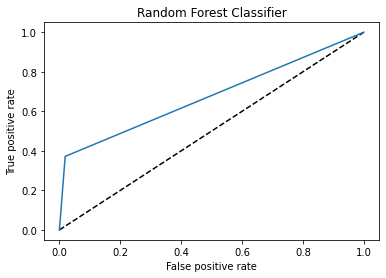

In [54]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier(area=%0.2f)'%roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [55]:
auc_score=roc_auc_score(y_test,final.predict(x_test))
print('Auc score:',auc_score)

Auc score: 0.6765247098076453


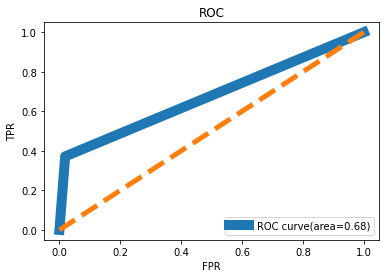

In [56]:
fpr, tpr, thresholds = roc_curve (y_test,pred)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,lw=10,label='ROC curve(area=%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],lw=5,linestyle='--')
#plt.xlim([0.0,1.0])
#plt.ylim([0.0,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [59]:
import pickle
pickle.dump(final,open(' term deposite data Analysis','wb'))

In [60]:
loaded_model= pickle.load(open(" term deposite data Analysis","rb"))
prediction= loaded_model.predict(x_test)
a= np.array(y_test)
df=pd.DataFrame()
df['predicted']= prediction
df['actual']= a
df

,predicted,actual
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
8271,0,0
8272,0,0
8273,0,0
8274,0,0


In [94]:
df_test = pd.read_csv("term_deposit_test.csv")

In [95]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [96]:
LE= LabelEncoder()
for i in df_test.columns:
    if df_test[i].dtypes == 'object':
        df_test[i]=LE.fit_transform(df_test[i].values.reshape(-1,1))
        
df_test= df_test.drop('poutcome',axis=1)
y1_test = df_test.iloc[:,-1]

In [99]:
prediction= loaded_model.predict(df_test)
a= np.array(y1_test)
df_test_final=pd.DataFrame()
df_test_final['predicted']= prediction
df_test_final['actual']= a
df_test_final

,predicted,actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
13559,0,0
13560,0,0
13561,0,0
13562,1,3


In [100]:
acc= accuracy_score(y1_test,prediction)
acc*100

76.76201710409909